In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



# Data Preparation

- Removed categories in each column that had less than 1% representation in the data.
- Addressed anomalies, including:
  - Columns containing multiple airlines or airports.
  - Misclassified airlines that were actually bus or train companies (before the CSV was created).
- Categorized flight hours into morning, noon, evening, and night.
- Converted the float column for baggage to integers.
- Removed outliers using Tukey's method, focusing on entries with more than one outlier.
- Removed unnecessary columns.
- Created dummy variables to relevant columns.
- Added a day of the week dummy (departure and return)


In [44]:
data=pd.read_csv('WorkDB-28.02.25.csv')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Origin                             179504 non-null  object 
 1   Destination                        179504 non-null  object 
 2   TTT                                179504 non-null  int64  
 3   LOS                                179504 non-null  int64  
 4   Departure Time                     179504 non-null  object 
 5   Departure Date                     179504 non-null  object 
 6   Arrival Time                       179504 non-null  object 
 7   Return Departure Time              179504 non-null  object 
 8   Return Date                        179504 non-null  object 
 9   Return Arrival Time                179504 non-null  object 
 10  Onward Departure Airport           179504 non-null  object 
 11  Onward Arrival Airport             1795

In [46]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [47]:
data['Departure DateTime String']=(data['Departure Date']+' '+data['Departure Time'])
data['Return DateTime String']=(data['Return Date']+' '+data['Return Departure Time'])


In [48]:
data['Departure DateTime']=pd.to_datetime(data['Departure DateTime String'],format='%d/%m/%Y %H:%M')
data['Return DateTime']=pd.to_datetime(data['Return DateTime String'],format='%d/%m/%Y %H:%M')

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


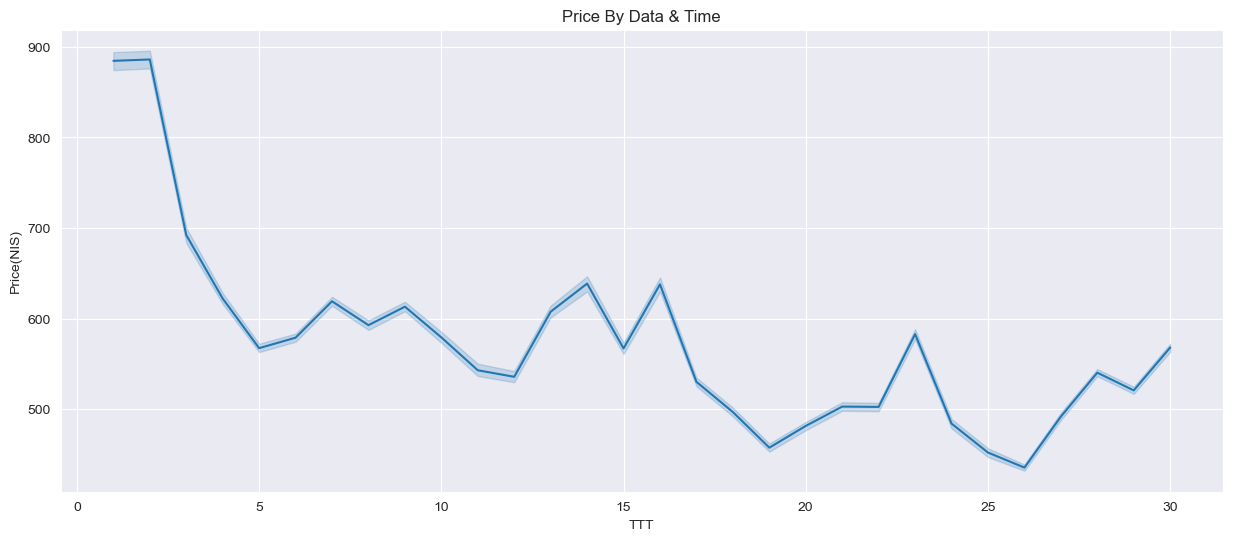

In [49]:
#Mean Price if there are 2 x's with the same value 
plt.figure(figsize=(15, 6))
sns.lineplot(data=data,x='TTT',y='Price(NIS)')
plt.ylabel("Price(NIS)")
plt.title("Price By Data & Time")
plt.show()

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


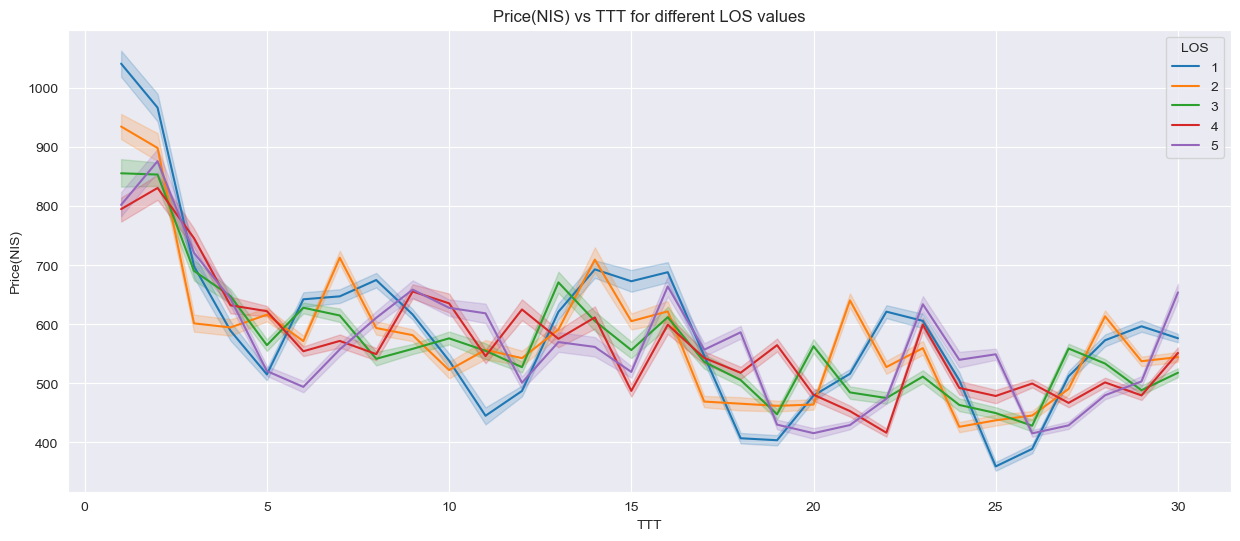

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='TTT', y='Price(NIS)', hue='LOS', data=data,palette="tab10")

plt.title('Price(NIS) vs TTT for different LOS values')
plt.xlabel('TTT')
plt.ylabel('Price(NIS)')
plt.legend(title='LOS')
plt.show()

**Data Preparation:**

In [51]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime String',
       'Return DateTime String', 'Departure DateTime', 'Return DateTime'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  object        
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  object        
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [53]:
data['Onward Airlines'].unique()

array(['Air France', 'Transavia France', 'easyJet', 'Vueling', 'Ryanair',
       'ITA Airways', 'Wizz Air', 'Iberia', 'Transavia France, Wizz Air',
       'Vueling, Ryanair', 'Vueling, Wizz Air', 'Ryanair, ITA Airways',
       'Ryanair, Wizz Air', 'Jet2', 'British Airways',
       'ITA Airways, Ryanair', 'Wizz Air, Wizz Air', 'Ryanair, easyJet',
       'Wizz Air, Ryanair', 'Aeroitalia, Ryanair',
       'Scandinavian Airlines', 'ITA Airways, Wizz Air', 'Eurowings',
       'Tunisair', 'Wizz Air, easyJet', 'Ryanair, Ryanair',
       'Austrian Airlines', 'KLM', 'Norwegian, Ryanair', 'Lufthansa',
       'Ryanair, Vueling', 'Vueling, Transavia France',
       'easyJet, Eurowings', 'Vueling, easyJet', 'Wizz Air, Air Albania',
       'Ryanair, Aeroitalia', 'easyJet, ITA Airways', 'easyJet, Volotea',
       'easyJet, Wizz Air', 'KM Malta Airlines', 'Wizz Air, Aeroitalia',
       'Norwegian', 'SWISS'], dtype=object)

In [54]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




229
272
1
0
5
2


In [55]:
data['Onward Airlines'] = data['Onward Airlines'].str.split(',').str[0]
data['Return Airlines'] = data['Return Airlines'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split('-').str[0]
data['Return Flight Connection Airport'] = data['Return Flight Connection Airport'].str.split('-').str[0]



In [56]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




0
0
0
0
0
0


In [57]:
#check for data with less than 1% 
for category in data.columns:
    category_counts = data[category].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < 0.01]
    print(f"Rare categories in '{category}':")
    print(rare_categories)
    print()

Rare categories in 'Origin':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Destination':
Series([], Name: proportion, dtype: float64)

Rare categories in 'TTT':
Series([], Name: proportion, dtype: float64)

Rare categories in 'LOS':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Departure Time':
Departure Time
8:10     0.009732
18:25    0.009643
16:30    0.009498
10:00    0.009437
19:35    0.009415
           ...   
19:30    0.000022
19:10    0.000017
7:45     0.000006
22:30    0.000006
21:50    0.000006
Name: proportion, Length: 166, dtype: float64

Rare categories in 'Departure Date':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Arrival Time':
Arrival Time
18:25      0.009855
19:05      0.009426
16:05      0.009365
20:05      0.009192
12:40      0.009147
             ...   
15:10+1    0.000006
9:05       0.000006
0:50       0.000006
23:20      0.000006
07:10+1    0.000006
Name: proportion, Length: 199, dtype: float64

Rare c

In [58]:
data = data[~data['Onward Departure Airport'].str.contains('SEN')]
data = data[~data['Onward Departure Airport'].str.contains('LCY')]
data = data[~data['Onward Arrival Airport'].str.contains('SEN')]
data = data[~data['Onward Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SEN')]
data = data[~data['Return Departure Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SOU')]
data = data[~data['Return Arrival Airport'].str.contains('SEN')]
data = data[~data['Return Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Arrival Airport'].str.contains('SOU')]
data = data[~data['Onward Airlines'].str.contains('Iberia')]
data = data[~data['Onward Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Onward Airlines'].str.contains('Eurowings')]
data = data[~data['Onward Airlines'].str.contains('Tunisair')]
data = data[~data['Onward Airlines'].str.contains('Lufthansa')]
data = data[~data['Onward Airlines'].str.contains('KLM')]
data = data[~data['Onward Airlines'].str.contains('Norwegian')]
data = data[~data['Onward Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Onward Airlines'].str.contains('Aeroitalia')]
data = data[~data['Onward Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Onward Airlines'].str.contains('SWISS')]

data = data[~data['Return Airlines'].str.contains('Iberia')]
data = data[~data['Return Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Return Airlines'].str.contains('Eurowings')]
data = data[~data['Return Airlines'].str.contains('Tunisair')]
data = data[~data['Return Airlines'].str.contains('Lufthansa')]
data = data[~data['Return Airlines'].str.contains('KLM')]
data = data[~data['Return Airlines'].str.contains('Norwegian')]
data = data[~data['Return Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Return Airlines'].str.contains('Aeroitalia')]
data = data[~data['Return Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Return Airlines'].str.contains('SWISS')]
data = data[~data['Return Airlines'].str.contains('Volotea')]


In [59]:
data['Checked Bags'].fillna(0,inplace=True)
data['Checked Bags'] = data['Checked Bags'].astype(int)
data['Carry-ons'].fillna(0,inplace=True)
data['Carry-ons'] = data['Carry-ons'].astype(int)


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [61]:
#turn Hour to int
data['Departure Hour']=data['Departure Time'].str.split(':').str[0].astype(int)
data['Arrival Hour']=data['Arrival Time'].str.split(':').str[0].astype(int)
data['Return Departure Hour']=data['Return Departure Time'].str.split(':').str[0].astype(int)
data['Return Arrival Hour']=data['Return Arrival Time'].str.split(':').str[0].astype(int)

def categorize_time(time):
    if 0 <= time < 6:
        return 'Night'
    elif 6 <= time < 12:
        return 'Morning'
    elif 12 <= time < 18:
        return 'Noon'
    else:
        return 'Evening'

data['Onward Departure Time Of Day'] = data['Departure Hour'].apply(categorize_time)
data['Onward Arrival Time Of Day'] = data['Arrival Hour'].apply(categorize_time)
data['Return Departure Time Of Day'] = data['Return Departure Hour'].apply(categorize_time)
data['Return Arrival Time Of Day'] = data['Return Arrival Hour'].apply(categorize_time)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [63]:
# Function to identify outliers using Tukey's method
def is_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Identify outliers for each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'int32', 'float64']).columns
outlier_flags = data[numeric_columns].apply(is_outlier)

# Count the number of outlier features for each row
data['outlier_count'] = outlier_flags.sum(axis=1)

# Print the rows and their corresponding outlier features
outlier_details = outlier_flags[data['outlier_count'] >= 2]
print("Rows to be removed and their corresponding outlier features:")
print(outlier_details[outlier_details.any(axis=1)])

# Remove rows with outliers in 2 or more features
rows_before = data.shape[0]
data_filtered = data[data['outlier_count'] < 3]
rows_after = data_filtered.shape[0]

# Drop the 'outlier_count' column as it's no longer needed
data_filtered = data_filtered.drop(columns=['outlier_count'])

print(f"\nTotal rows removed: {rows_before - rows_after}")




Rows to be removed and their corresponding outlier features:
          TTT    LOS  Onward Flight Connections  \
0       False  False                      False   
1       False  False                      False   
2       False  False                      False   
3       False  False                      False   
4       False  False                      False   
...       ...    ...                        ...   
179104  False  False                      False   
179107  False  False                       True   
179111  False  False                      False   
179112  False  False                      False   
179114  False  False                      False   

        Onward Connection Duration(min)  Return Flight Connections  \
0                                 False                      False   
1                                 False                       True   
2                                 False                      False   
3                                 False       

In [64]:
print(data.shape)
print(data_filtered.shape)


(174969, 42)
(171790, 41)


In [65]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171790 entries, 0 to 179503
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             171790 non-null  object        
 1   Destination                        171790 non-null  object        
 2   TTT                                171790 non-null  int64         
 3   LOS                                171790 non-null  int64         
 4   Departure Time                     171790 non-null  object        
 5   Departure Date                     171790 non-null  object        
 6   Arrival Time                       171790 non-null  object        
 7   Return Departure Time              171790 non-null  object        
 8   Return Date                        171790 non-null  object        
 9   Return Arrival Time                171790 non-null  object        
 10  Onward Departure Airport 

In [66]:
data_filtered['Day Of Week Departure']=data['Departure DateTime'].dt.strftime('%A')
data_filtered['Day Of Week Return']=data['Return DateTime'].dt.strftime('%A')



In [67]:
columns_to_drop = ['Origin', 'Destination','Departure Time','Departure Date','Arrival Time','Return Departure Time','Return Date','Return Arrival Time','Onward Flight Connection Airport','Return Flight Connection Airport'
,'Snapshot Time','Departure DateTime String','Departure DateTime','Departure Hour','Arrival Hour','Return Departure Hour','Return Arrival Hour','Return DateTime','Return DateTime String']
data_filtered=data_filtered.drop(columns=columns_to_drop)

In [68]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171790 entries, 0 to 179503
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   TTT                                171790 non-null  int64 
 1   LOS                                171790 non-null  int64 
 2   Onward Departure Airport           171790 non-null  object
 3   Onward Arrival Airport             171790 non-null  object
 4   Return Departure Airport           171790 non-null  object
 5   Return Arrival Airport             171790 non-null  object
 6   Onward Airlines                    171790 non-null  object
 7   Return Airlines                    171790 non-null  object
 8   Onward Flight Connections          171790 non-null  int64 
 9   Onward Connection Duration(min)    171790 non-null  int64 
 10  Return Flight Connections          171790 non-null  int64 
 11  Return Connection Duration(min)    171790 non-null  int64

In [69]:
data_filtered = pd.get_dummies(data_filtered, columns=['Onward Departure Airport', 'Onward Arrival Airport','Return Departure Airport','Return Arrival Airport','Onward Airlines','Return Airlines','Site','Onward Departure Time Of Day','Onward Arrival Time Of Day','Return Departure Time Of Day','Return Arrival Time Of Day','Day Of Week Departure','Day Of Week Return'],drop_first=True)

In [70]:
data_filtered.columns

Index(['TTT', 'LOS', 'Onward Flight Connections',
       'Onward Connection Duration(min)', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Carry-ons', 'Checked Bags',
       'Price(NIS)', 'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Onward Departure Airport_CDG',
       'Onward Departure Airport_CIA', 'Onward Departure Airport_FCO',
       'Onward Departure Airport_LGW', 'Onward Departure Airport_LHR',
       'Onward Departure Airport_LTN', 'Onward Departure Airport_ORY',
       'Onward Departure Airport_STN', 'Onward Arrival Airport_CDG',
       'Onward Arrival Airport_CIA', 'Onward Arrival Airport_FCO',
       'Onward Arrival Airport_LGW', 'Onward Arrival Airport_LHR',
       'Onward Arrival Airport_LTN', 'Onward Arrival Airport_ORY',
       'Onward Arrival Airport_STN', 'Return Departure Airport_CDG',
       'Return Departure Airport_CIA', 'Return Departure Airport_FCO',
       'Return Departure Airport_LGW', 'Return Depa

# XGBOOST Boost

In [71]:
from xgboost import XGBRegressor


In [72]:
from sklearn.model_selection import train_test_split

X = data_filtered.drop(columns=['Price(NIS)'])
y = data_filtered['Price(NIS)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7], 
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  }

xgb = XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


In [74]:
y_pred = best_model.predict(X_test)


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 32.31
MSE: 2307.50
RMSE: 48.04
R² Score: 0.9648


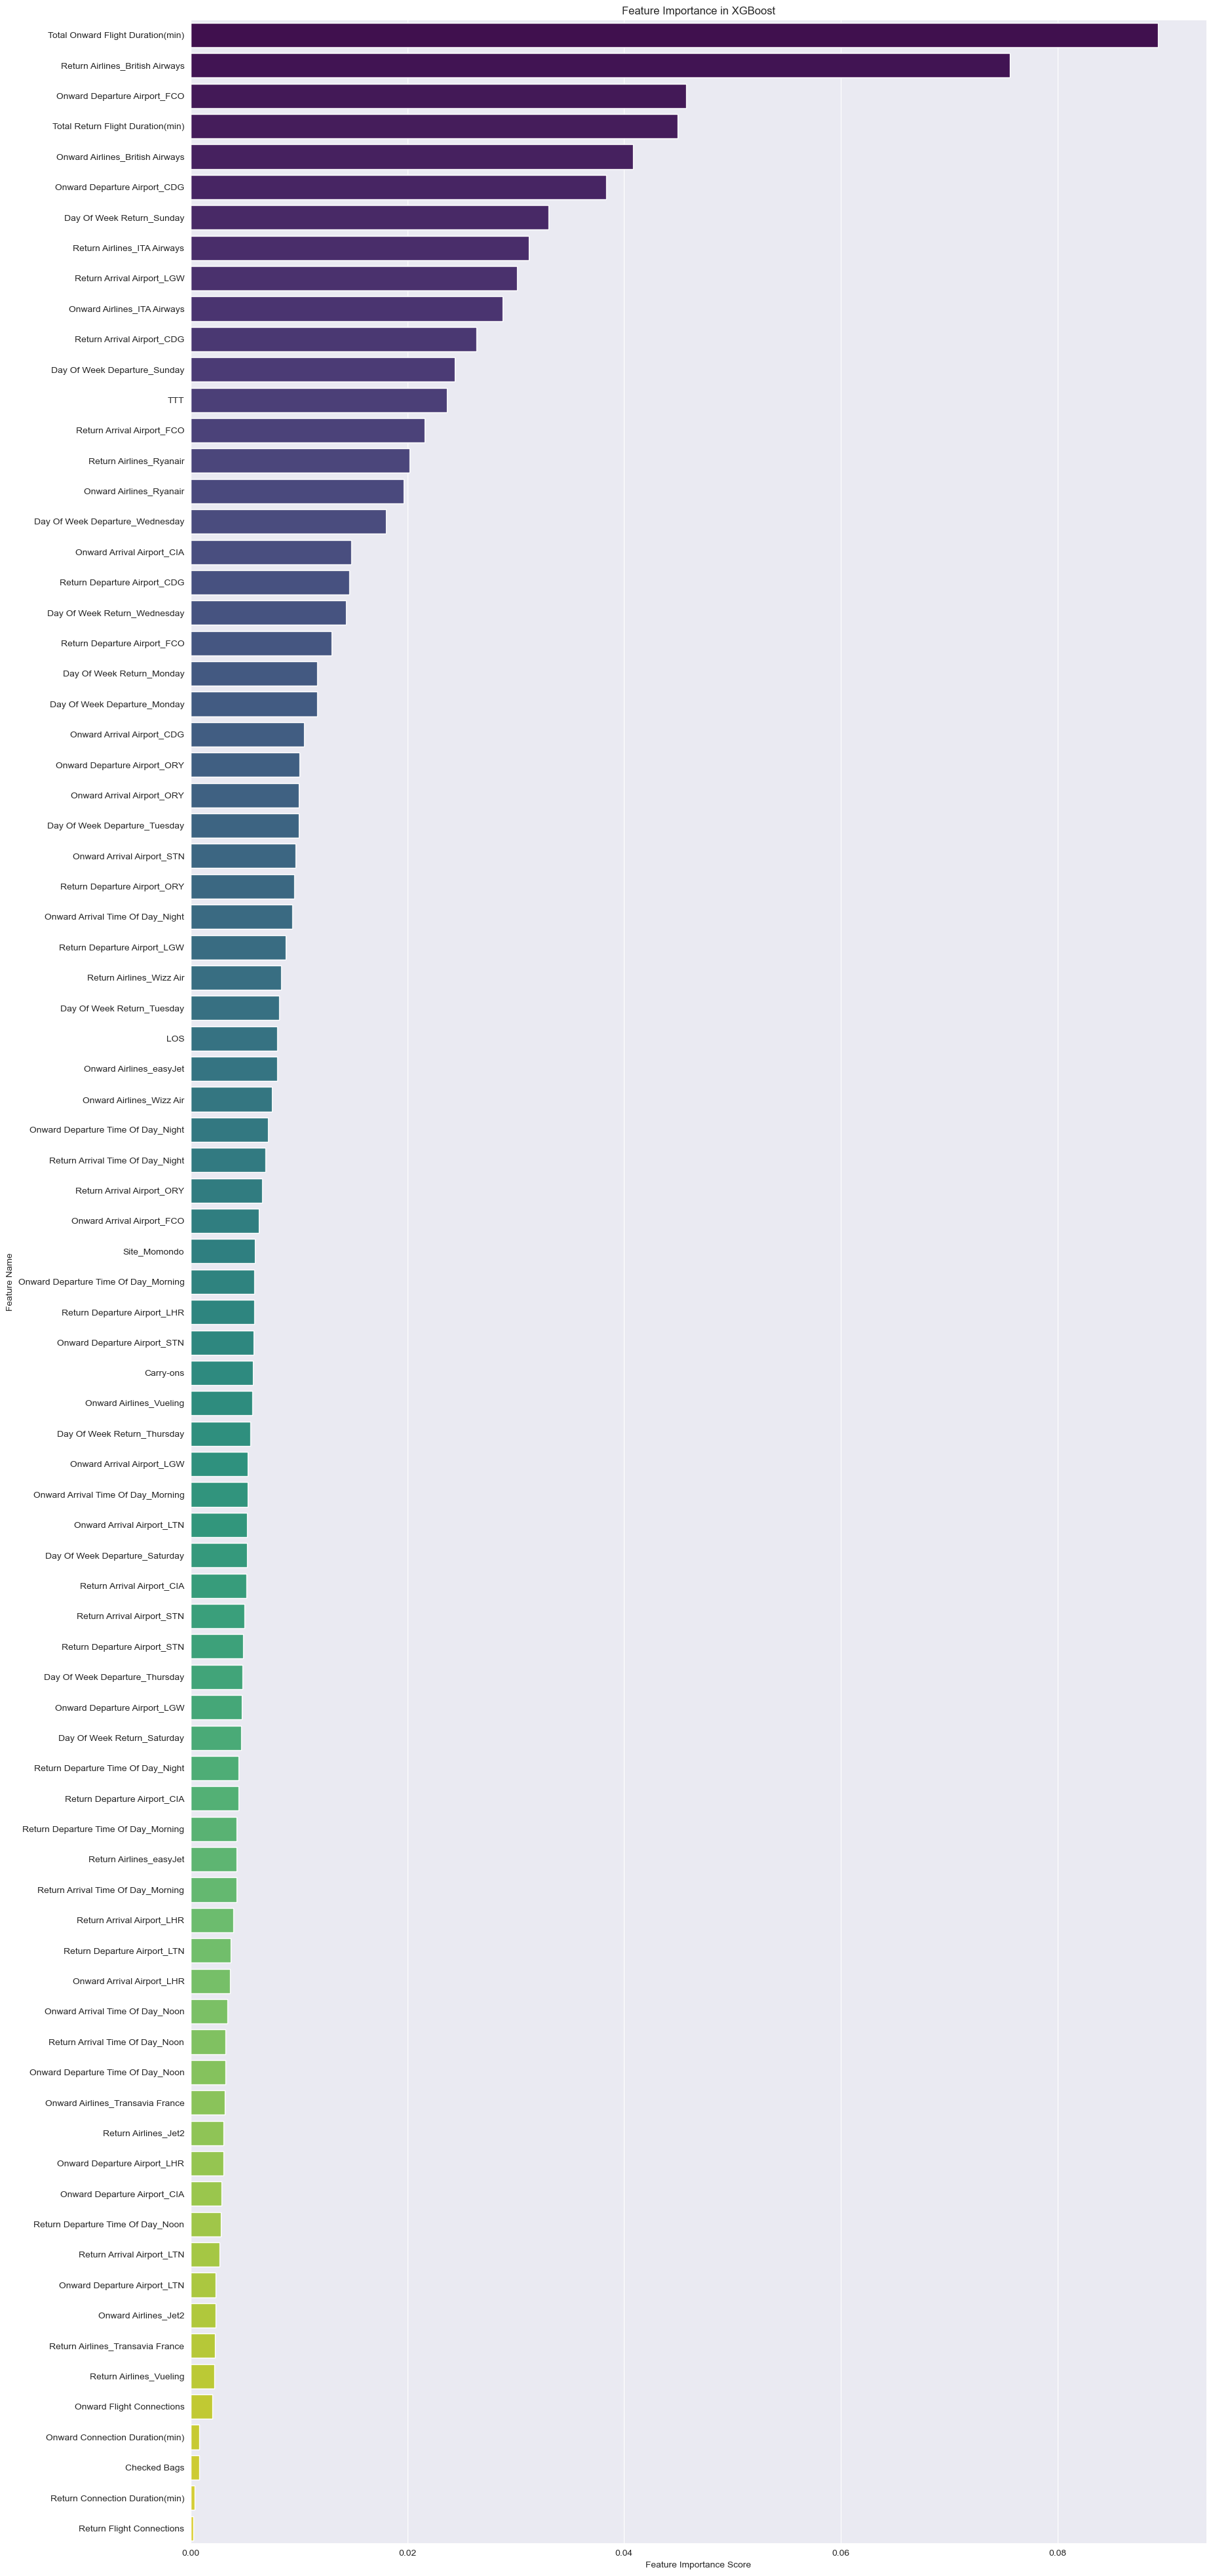

In [76]:
importances = best_model.feature_importances_

# סידור הפיצ'רים לפי חשיבות
sorted_idx = np.argsort(importances)[::-1]
feature_names = X_train.columns[sorted_idx]

# הצגת גרף חשיבות
plt.figure(figsize=(20,50))
sns.barplot(x=importances[sorted_idx], y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in XGBoost")
plt.show()

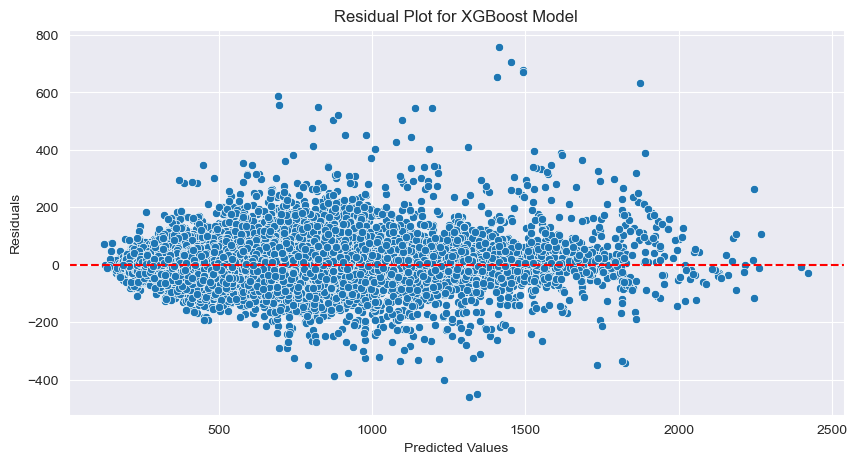

In [77]:
residuals = y_test - y_pred

# שרטוט גרף Residuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost Model")
plt.show()

In [78]:
"""for new X's without Y
future_predictions = best_model.predict(X_future)
print(future_predictions)"""

"for new X's without Y\nfuture_predictions = best_model.predict(X_future)\nprint(future_predictions)"

# Colclusion:
In this study, we utilized XGBoost with optimized hyperparameters (colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8), achieving strong predictive performance (R² = 0.9648). The residual plot indicates that while the model performs well overall, some variance exists at higher predicted values, suggesting minor heteroscedasticity. However, no significant patterns in the residuals suggest that overfitting is well-controlled, likely due to the chosen parameters, particularly subsample=0.8 and learning_rate=0.2, which help generalize better.

The feature importance analysis highlights an interesting result—return airline choices (e.g., British Airways, ITA Airways) are more influential than certain categorical features like "TTT." This may be due to the return airline directly influencing ticket prices and overall travel experience, whereas "TTT" may capture less relevant or redundant information. when still Sunday as the day of departure is very important. While this might seem unexpected, it reflects the strong correlation between airline selection and pricing strategies. Overall, our findings suggest that XGBoost is an effective approach for predicting flight prices, with key insights into feature relevance and model generalization